In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [2]:
# TITLE_SIZE = 20
AX_TITLE_SIZE = 16
LABEL_SIZE = 14

In [3]:
params = {
    'text.usetex' : True,
    'font.size' : AX_TITLE_SIZE,
#     'font.family' : 'lmodern',
#     'text.latex.unicode': True,
}
plt.rcParams.update(params) 

fontP = FontProperties()
fontP.set_size(12)

In [4]:
def get_data(dist, test, small, LOOCV):
    file_name = dist
    if small:
        file_name += '_small'
    file_name += '_test' if test else '_train'
    if LOOCV:
        file_name += '_LOOCV'
    
    return np.loadtxt(r'../results/' + file_name + '.txt', delimiter=',', skiprows=1)

## Question A

In [35]:
eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train = get_data('euclidian', test=False, small=True, LOOCV=False)

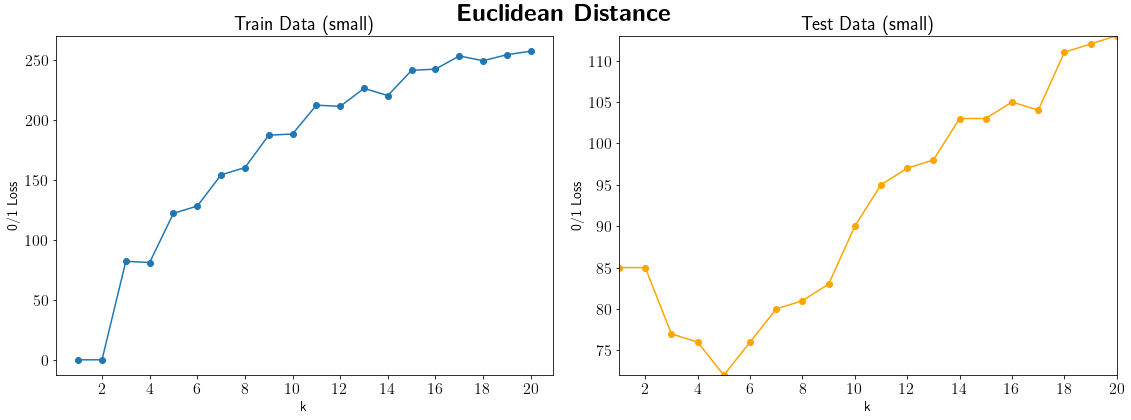

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train[:,1])+1, 2)])
ax1.plot(eucl_train[:,1], eucl_train[:,0], marker='o')

ax2.set_title(r'Test Data (small)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')
plt.autoscale(tight=True)


fig.tight_layout()
# fig.subplots_adjust(top=.85)
fig.savefig(
    r'../figures/QA.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question B

In [37]:
eucl_train_LOOCV = get_data('euclidian', test=False, small=True, LOOCV=True)
eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train_LOOCV_risk = eucl_train_LOOCV[:, 0]/2999

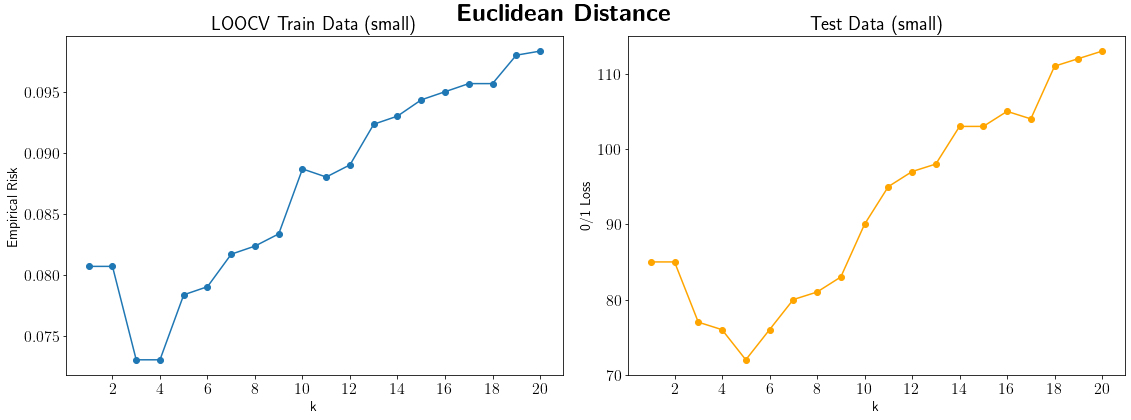

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'LOOCV Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
ax1.plot(eucl_train_LOOCV[:,1], eucl_train_LOOCV_risk, marker='o')

ax2.set_title(r'Test Data (small)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')


fig.tight_layout()
# fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QB.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question C

In [39]:
min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True)
min_test = get_data('minkowski', test=True, small=True, LOOCV=False)
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999
# min_train_LOOCV[np.where(min_train_LOOCV[:, 2] == 4)]

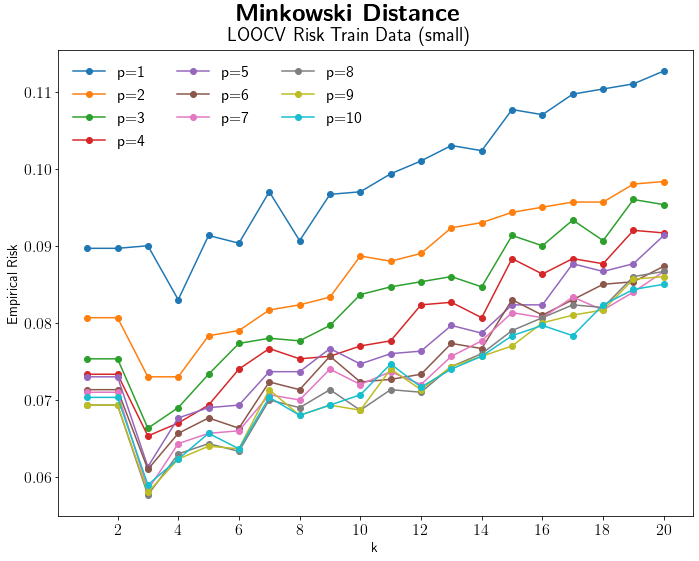

In [41]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')

fig.suptitle(
    r"\Huge{\textbf{Minkowski Distance}}" "\n" r"LOOCV Risk Train Data (small)",
#     y=1.01
)

# ax1.set_title('LOOCV Train Data', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
for p in np.sort(np.unique(min_train_LOOCV[:, 2])):
    p_results = np.where(min_train_LOOCV[:, 2] == p)
    ax1.plot(
        min_train_LOOCV[p_results][:, 1],
        min_train_LOOCV_risk[p_results],
        marker='o',
        label=f'p={int(p)}'
    )

# ax1.set_yscale('log')    
ax1.legend(
    loc='upper left',
#     fancybox=True,
#     prop=fontP,
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QC.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question D

## Question E

In [42]:
min_train_loocv = np.loadtxt(r'..\results\QE\minkowski_train_LOOCV.txt', delimiter=',', skiprows=1)

In [60]:
min_train_loocv_agg = []
for k in np.sort(np.unique(min_train_loocv[:, 2])):
    k = int(k)
    k_loss = np.sum(min_train_loocv[np.where(min_train_loocv[:, 2] == k)][:, 1])
    min_train_loocv_agg.append([
        k_loss,
        k,
        8
    ])
np.savetxt(r'..\results\QE\minkowski_train_LOOCV_agg.txt', min_train_loocv_agg, delimiter=",", fmt='%s')
min_train_loocv_agg = np.array(min_train_loocv_agg)
min_train_loocv_agg_risk = min_train_loocv_agg[:, 0]/(60_000-1)
min_train_loocv_agg

array([[36.,  1.,  8.],
       [36.,  2.,  8.],
       [36.,  3.,  8.],
       [37.,  4.,  8.],
       [41.,  5.,  8.],
       [38.,  6.,  8.],
       [43.,  7.,  8.],
       [38.,  8.,  8.],
       [41.,  9.,  8.],
       [41., 10.,  8.],
       [44., 11.,  8.],
       [44., 12.,  8.],
       [46., 13.,  8.],
       [45., 14.,  8.],
       [49., 15.,  8.],
       [50., 16.,  8.],
       [48., 17.,  8.],
       [52., 18.,  8.],
       [50., 19.,  8.],
       [48., 20.,  8.]])

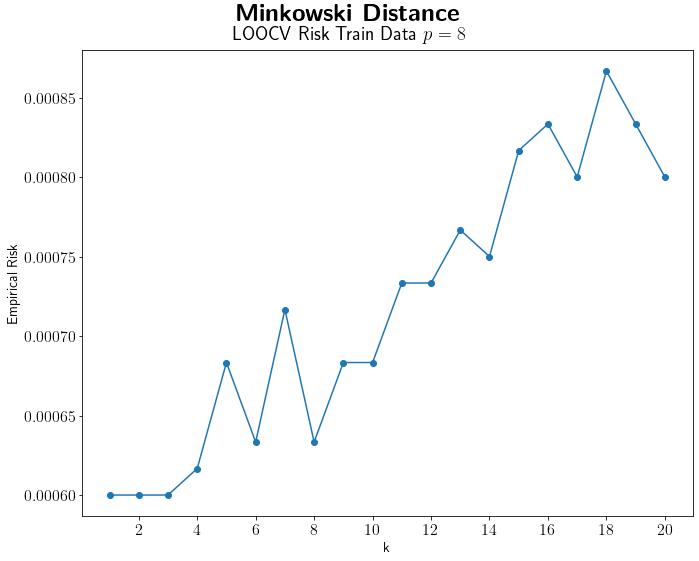

In [59]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')

fig.suptitle(
    r"\Huge{\textbf{Minkowski Distance}}" "\n" r"LOOCV Risk Train Data $p=8$",
#     y=1.01
)

ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(min_train_loocv_agg[:,1])+1, 2)])
ax1.plot(min_train_loocv_agg[:, 1], min_train_loocv_agg_risk, marker='o')


fig.tight_layout()
fig.subplots_adjust(top=.905)
# fig.savefig(
#     r'../figures/QE.png',
#     bbox_size='tight',
#     dpi=350,
#     transparent=True,
#     pad_inches=0
# )